In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

In [2]:
excel_files="marks_dataset.xlsx"

In [3]:
sheets=pd.read_excel(excel_files,sheet_name=None)

In [9]:
cleaned=[]
for i, (sheet_name, df) in enumerate(sheets.items(), start=1):
    drop_cols = [c for c in df.columns if 'unnamed' in c.lower()]
    df=df.drop(columns=drop_cols, errors='ignore')
    df['sheet_id']=i
    for col in df.columns:
        if col!='sheet_id':
            df[col]=pd.to_numeric(df[col], errors='coerce')
    cleaned.append(df)

In [12]:
data=pd.concat(cleaned, ignore_index=True)
data = data.fillna(0)
print("Combined data shape:", data.shape)
print(f"Total Rows: {data.shape[0]}")
print(f"Total Columns: {data.shape[1]}")
print("\nFirst 5 rows:")
display(data.head())

Combined data shape: (272, 31)
Total Rows: 272
Total Columns: 31

First 5 rows:


,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,...,Proj:1,Proj,S-I:2,S-I:3,S-II:2,S-II:3,Final:2,Final:3,Final:4,Final:5
0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,130.0,70.0,90.0,50.0,120.0,90.0,5.0,15.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.5,60.5,73.5,40.5,59.0,70.5,3.5,5.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72.5,68.0,39.0,35.0,80.5,71.0,2.5,7.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cleaning data to remove 'Weightage' rows...

 Summary Statistics


,count,mean,std,min,25%,50%,75%,max
As:1,272.0,54.450919,32.251318,0.0,33.8750,60.000,72.1250,130.0
As:2,272.0,57.712500,34.803407,0.0,39.6250,67.000,83.1250,120.0
As:3,272.0,66.406985,32.139216,0.0,51.0000,75.000,88.0000,120.0
As:4,272.0,38.736397,24.047494,0.0,20.3750,44.000,57.0000,80.0
As:5,272.0,35.334559,39.556603,0.0,0.0000,1.500,70.3750,120.0
As:6,272.0,13.937500,28.047629,0.0,0.0000,0.000,0.0000,90.0
Qz:1,272.0,3.861471,2.892114,0.0,1.5000,3.500,5.6250,10.0
Qz:2,272.0,3.901912,3.349194,0.0,0.3750,3.500,6.0000,15.0
Qz:3,272.0,4.480956,3.266617,0.0,1.9150,4.000,7.0000,16.0
Qz:4,272.0,3.971250,3.392264,0.0,1.0000,3.065,6.1250,10.0



----EDA-----


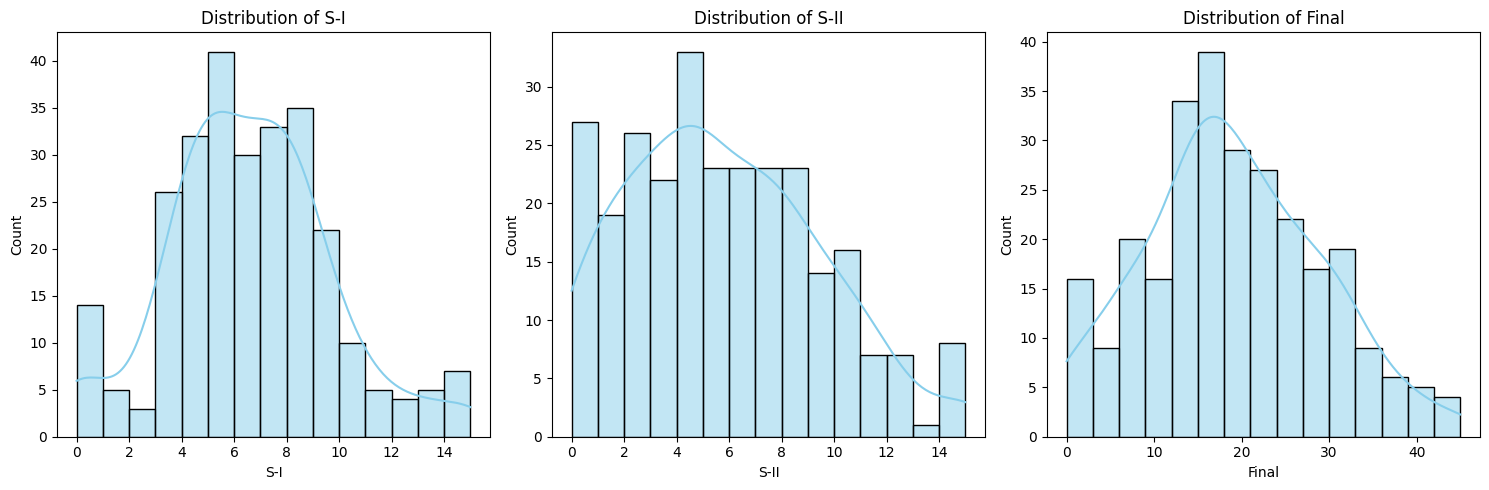

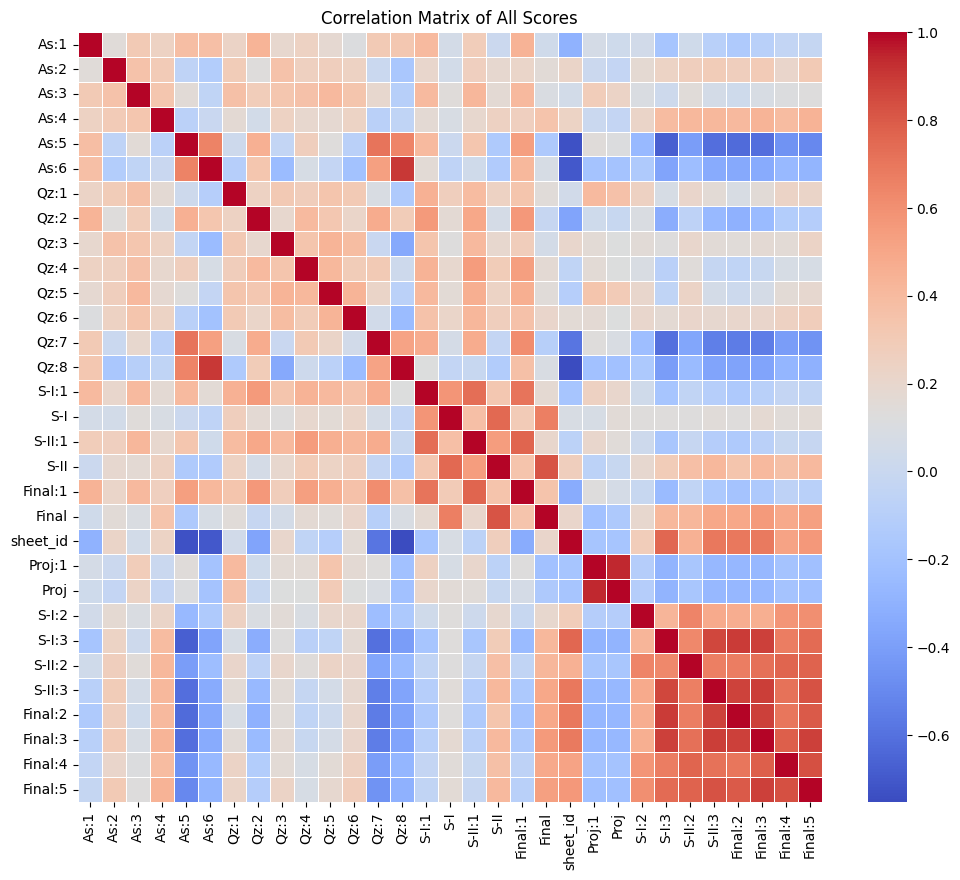


- What predicts the Final Exam best? 
Final      1.000000
S-II       0.815348
S-I        0.670482
Final:3    0.558440
Final:5    0.528634
Final:2    0.498327
S-II:3     0.497524
Final:4    0.490666
S-II:2     0.418703
S-I:3      0.417605
Name: Final, dtype: float64


In [ ]:
df_clean = data[~data.astype(str).apply(lambda x: x.str.contains('Weightage', case=False)).any(axis=1)].copy()

cols_to_exclude = ['Student_ID', 'Sheet_ID']
for col in df_clean.columns:
    if col not in cols_to_exclude:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean.fillna(0, inplace=True)

print("\n Summary Statistics")
display(df_clean.describe().T)
print("\n----EDA-----")
targets = ['S-I', 'S-II', 'Final']
plt.figure(figsize=(15, 5))
for i, col in enumerate(targets):

    if col in df_clean.columns:
        plt.subplot(1, 3, i+1)
        sns.histplot(df_clean[col], kde=True, bins=15, color='skyblue')
        plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 10))


numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of All Scores")
plt.show()
print("\n- What predicts the Final Exam best? ")
if 'Final' in correlation_matrix.columns:
    print(correlation_matrix['Final'].sort_values(ascending=False).head(10))

In [62]:
df_clean.to_excel("Cleaned_dataset.xlsx", index=False)

In [15]:
mid1="S-I"
mid2="S-II"
final="Final"

In [16]:
a1, a2, a3, a4, a5, a6="As:1", "As:2", "As:3", "As:4", "As:5", "As:6"
q1, q2, q3, q4, q5, q6, q7, q8="Qz:1", "Qz:2", "Qz:3", "Qz:4", "Qz:5", "Qz:6", "Qz:7", "Qz:8"

In [17]:
rq1_x=[a1, a2, q1, q2, q3]
rq1_y=mid1

In [18]:
rq2_x=[a3,a4, q4, q5, q6, mid1]
rq2_y=mid2

In [19]:
rq3_x=[a1, a2, a3, a4, a5, a6,q1,q2,q3,q4,q5,q6, q7, q8, mid1, mid2]
rq3_y=final

In [30]:
X1 = df_clean[rq1_x]
y1 = df_clean[rq1_y]
X2 = df_clean[rq2_x]
y2 = df_clean[rq2_y]
X3 = df_clean[rq3_x]
y3 = df_clean[rq3_y]


In [38]:
def analyze_rq(X, y, rq_name, simple_feature_index=0):
    print(f"\n================ {rq_name} ================")
    if isinstance(X, np.ndarray):
        X_df = pd.DataFrame(X)
    else:
        X_df = X.copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y, test_size=0.2, random_state=42
    )
    models = {
        "Dummy (Baseline)": DummyRegressor(strategy="mean"),
        "Simple Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
        "Multiple Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    }

    results = []
    print(f"Bootstrapping 500 times for {rq_name}...")

    for name, model in models.items():
        mae_scores = []

        for i in range(500):
            X_boot, y_boot = resample(X_train, y_train, random_state=i)
            if name == "Simple Linear Regression":
                X_boot_used = X_boot.iloc[:, [simple_feature_index]].values
                X_test_used = X_test.iloc[:, [simple_feature_index]].values
            elif name == "Dummy (Baseline)":
                X_boot_used = X_boot.values
                X_test_used = X_test.values
            else:
                X_boot_used = X_boot.values
                X_test_used = X_test.values

          
            model.fit(X_boot_used, y_boot)

            y_pred = model.predict(X_test_used)
            mae = mean_absolute_error(y_test, y_pred)
            mae_scores.append(mae)

        lower_ci = np.percentile(mae_scores, 2.5)
        upper_ci = np.percentile(mae_scores, 97.5)
        mean_mae = np.mean(mae_scores)

        if name == "Simple Linear Regression":
            X_train_used = X_train.iloc[:, [simple_feature_index]].values
            X_test_used = X_test.iloc[:, [simple_feature_index]].values
        else:
            X_train_used = X_train.values
            X_test_used = X_test.values

        model.fit(X_train_used, y_train)
        y_pred_final = model.predict(X_test_used)
        y_train_pred = model.predict(X_train_used)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
        r2 = r2_score(y_test, y_pred_final)
        train_r2 = r2_score(y_train, y_train_pred)

        results.append({
            "Model": name,
            "MAE (Mean)": round(mean_mae, 2),
            "95% CI (MAE)": f"[{round(lower_ci, 2)}, {round(upper_ci, 2)}]",
            "RMSE": round(rmse, 2),
            "Test R2": round(r2, 2),
            "Train R2": round(train_r2, 2),
        })

    results_df = pd.DataFrame(results)
    display(results_df)

    best_model = results_df.sort_values(by="MAE (Mean)").iloc[0]
    print(f"\nBEST MODEL for {rq_name}: {best_model['Model']}")
    if best_model["Train R2"] > best_model["Test R2"] + 0.15:
        print("Potential OVERFITTING: Train R2 much higher than Test R2.")
    else:
        print("Train/Test scores are balanced: GOOD generalization.")


In [39]:
analyze_rq(X1, y1, "RQ1: Predict Midterm 1", simple_feature_index=2)
analyze_rq(X2, y2, "RQ2: Predict Midterm 2", simple_feature_index=5)
analyze_rq(X3, y3, "RQ3: Predict Final", simple_feature_index=len(rq3_x) - 1)



================ RQ1: Predict Midterm 1 ================
Bootstrapping 500 times for RQ1: Predict Midterm 1...


,Model,MAE (Mean),95% CI (MAE),RMSE,Test R2,Train R2
0,Dummy (Baseline),2.67,"[2.54, 2.81]",3.40,-0.19,0.00
1,Simple Linear Regression,2.51,"[2.35, 2.69]",3.35,-0.16,0.09
2,Multiple Linear Regression,2.48,"[2.25, 2.73]",3.36,-0.17,0.11



BEST MODEL for RQ1: Predict Midterm 1: Multiple Linear Regression
Potential OVERFITTING: Train R2 much higher than Test R2.

================ RQ2: Predict Midterm 2 ================
Bootstrapping 500 times for RQ2: Predict Midterm 2...


,Model,MAE (Mean),95% CI (MAE),RMSE,Test R2,Train R2
0,Dummy (Baseline),3.09,"[3.08, 3.12]",3.83,-0.05,0.00
1,Simple Linear Regression,1.99,"[1.95, 2.06]",2.32,0.62,0.55
2,Multiple Linear Regression,1.86,"[1.78, 1.95]",2.12,0.68,0.60



BEST MODEL for RQ2: Predict Midterm 2: Multiple Linear Regression
Train/Test scores are balanced: GOOD generalization.

================ RQ3: Predict Final ================
Bootstrapping 500 times for RQ3: Predict Final...


,Model,MAE (Mean),95% CI (MAE),RMSE,Test R2,Train R2
0,Dummy (Baseline),8.16,"[7.85, 8.46]",10.09,-0.08,0.00
1,Simple Linear Regression,5.53,"[5.38, 5.71]",6.94,0.49,0.70
2,Multiple Linear Regression,4.09,"[3.83, 4.41]",5.20,0.71,0.83



BEST MODEL for RQ3: Predict Final: Multiple Linear Regression
Train/Test scores are balanced: GOOD generalization.


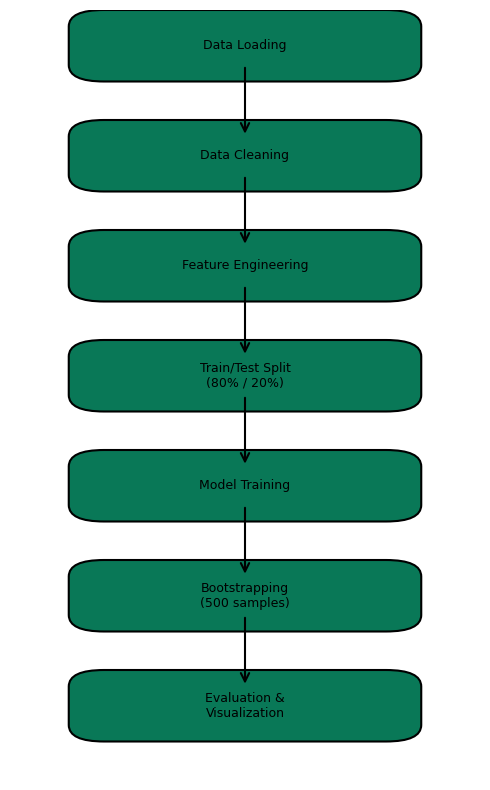

In [64]:

from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
plt.rcParams["figure.figsize"] = (5, 8)
fig, ax = plt.subplots()
ax.set_xlim(0, 4)
ax.set_ylim(0, 14)
ax.axis("off")

def box(x, y, w, h, text):
    rect = FancyBboxPatch((x, y), w, h,
                          boxstyle="round,pad=0.3",
                          linewidth=1.5,
                          edgecolor="black",
                          facecolor="#097857")
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text,
            ha="center", va="center", fontsize=9)
def arrow_between(y_top, y_bottom, x=2):
    arr = FancyArrowPatch((x, y_top), (x, y_bottom),
                          arrowstyle="->", linewidth=1.5,
                          mutation_scale=15, color="black")
    ax.add_patch(arr)
x = 0.8
w = 2.4
h = 0.7
ys = [13.0, 11.0, 9.0, 7.0, 5.0, 3.0, 1.0]
steps = [
    "Data Loading",
    "Data Cleaning",
    "Feature Engineering",
    "Train/Test Split\n(80% / 20%)",
    "Model Training",
    "Bootstrapping\n(500 samples)",
    "Evaluation &\nVisualization",
]
for y, label in zip(ys, steps):
    box(x, y, w, h, label)
for i in range(len(ys) - 1):
    y_top = ys[i]
    y_bottom = ys[i+1] + h
    arrow_between(y_top, y_bottom, x + w/2)

plt.tight_layout()
plt.savefig("workflow_diagram.png", dpi=150, bbox_inches="tight")
plt.show()
